# ***flight  ticket price prediction :***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [ ]:
data = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [ ]:
data1=files.upload()

Saving Test_set.xlsx to Test_set.xlsx


The files have been categorized into two sections: train and test. Both of them are in the 'xlsc' format

In [ ]:
train_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Test_set.xlsx')

Both 'xlsc; format data covert to dataframe

In [ ]:
train_data.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [ ]:
test_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [ ]:
print("train_data",train_data.shape)
print("test_data",test_data.shape)

train_data (10683, 11)
test_data (2671, 10)


In [ ]:
df = train_data.append(test_data)
print(df.shape)
df_copy=df.copy()

(13354, 11)


<ipython-input-545-dfcd43b61805>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_data.append(test_data)


df has rows= 13354 and columns =11,
1. the first 10683 rows are train data
2. The last 2671 rows are test data
>Two data sets will be combined to prepare and visualize before splitting.

In [ ]:
# to see the index difference for both data set

df.iloc[10680:10687,:]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753.0
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN


# ***EDA ;***

In [ ]:
df.shape

(13354, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


All columns in the dataset are of the 'object' type except the 'price' column, which is of the 'float' type.

In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

# **Data Preparation** ;

In [ ]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

split the values in df['Date_of_Journey'] using '/'. Then, insert new features with the split values (['Date', 'month', 'Year']).

In [ ]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019


In [ ]:
# drop the column
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019


In [ ]:
df_copy1 =df.copy()

In [ ]:

df['Route1'] = df['Route'].str.split(" ").str[0]
df['Route2'] = df['Route'].str.split(" ").str[2]
df['Route3'] = df['Route'].str.split(" ").str[4]
df['Route4'] = df['Route'].str.split(" ").str[6]
df['Route5'] = df['Route'].str.split(" ").str[8]

In [ ]:
df.sample(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
7630,IndiGo,Delhi,Cochin,DEL → BOM → COK,10:35,21:00,10h 25m,1 stop,No info,7503.0,18,05,2019,DEL,BOM,COK,NaN,NaN
1851,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25 26 May,29h 20m,2 stops,No info,16704.0,24,05,2019,DEL,AMD,BOM,COK,NaN


In [ ]:
# replace null value as 'none' value

r_columns=['Route1','Route2','Route3','Route4','Route5']
for i in r_columns:
  df[i]=df[i].fillna('None')

df.sample(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
5923,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,14:00,01:35 22 Mar,11h 35m,1 stop,No info,13542.0,21,03,2019,DEL,BOM,COK,None,None


In [ ]:
# drop the orginal feature ['Route']

df.drop('Route',axis=1,inplace=True)


In [ ]:
df.sample(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
3080,IndiGo,Delhi,Cochin,05:35,08:50,3h 15m,non-stop,No info,6885.0,9,03,2019,DEL,COK,None,None,None


next deal with ['Dep_Time'] feature

In [ ]:
df_copy2 = df.copy()

df['Dep_Hours'] = df['Dep_Time'].str.split(":").str[0]
df['Dep_Minutes'] =df['Dep_Time'].str.split(":").str[1]


# check null values
print(df['Dep_Hours'].isnull().sum())
print(df['Dep_Minutes'].isnull().sum())

0
0


In [ ]:
# drop the original feature
df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
df.head(1)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,None,None,None,22,20


Next deal with ['Arrival_Time'] feature




In [ ]:
df_copy3=df.copy()

In [ ]:
# spliting data values and add the values to new features

df['Arrival_Hours'] = df['Arrival_Time'].str.split(":").str[0]
df['Arrival_Minutes'] = df['Arrival_Time'].str.split(":").str[0]


In [ ]:
# drop orginal feature
df.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
# check null values
print("null values in df['Arrival_Hours']:" ,df['Arrival_Hours'].isnull().sum())
print("null values in df['Arrival_Minutes']:",df['Arrival_Minutes'].isnull().sum())

null values in df['Arrival_Hours']: 0
null values in df['Arrival_Minutes']: 0


In [ ]:
df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,None,None,None,22,20,01,01


deals with duration

In [ ]:
df_copy4= df.copy()

In [ ]:
def duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
    return x
df['Duration']= df['Duration'].apply(duration)

# split hours and minitues
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_minute'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

# change dtype
df['Duration_minute'] = df['Duration_minute'].astype(float)
df['Duration_hour'] = df['Duration_hour'].astype(float)


df['Duration_in_min'] = df['Duration_hour'] * 60 + df['Duration_minute']

# drop features
df = df.drop(columns = ['Duration','Duration_hour','Duration_minute'] ,axis =1)



In [ ]:
df.head(4)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_in_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,03,2019,BLR,DEL,None,None,None,22,20,01,01,170.0
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,None,05,50,13,13,445.0
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,None,09,25,04,04,1140.0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,05,2019,CCU,NAG,BLR,None,None,18,05,23,23,325.0


next deals with ['Total_Stops'] feature

In [ ]:
df_copy5 = df.copy()

In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
# check null value
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_in_min
9039,Air India,Delhi,Cochin,NaN,No info,7480.0,6,05,2019,None,None,None,None,None,09,45,09,09,1420.0


In [ ]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [ ]:
# replace with mode() value
df['Total_Stops'].fillna('1 stop',inplace=True)

# unique values
print(df['Total_Stops'].unique())

# counts of the unique values
print(df['Total_Stops'].value_counts())

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64


In [ ]:
# replace value
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')
df['Total_Stops'].unique()

array(['0 stop', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [ ]:
# split the data using str.split()
df['Total_Stops']=df['Total_Stops'].str.split(" ").str[0]

df['Total_Stops'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [ ]:
# drop the feature
df.drop("Additional_Info",axis=1,inplace=True)

dropped the feature because most of the values in the 'Additional_Info' of the data frame had the label 'no_info'.

In [ ]:
# check dtype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Total_Stops      13354 non-null  object 
 4   Price            10683 non-null  float64
 5   Date             13354 non-null  object 
 6   Month            13354 non-null  object 
 7   Year             13354 non-null  object 
 8   Route1           13354 non-null  object 
 9   Route2           13354 non-null  object 
 10  Route3           13354 non-null  object 
 11  Route4           13354 non-null  object 
 12  Route5           13354 non-null  object 
 13  Dep_Hours        13354 non-null  object 
 14  Dep_Minutes      13354 non-null  object 
 15  Arrival_Hours    13354 non-null  object 
 16  Arrival_Minutes  13354 non-null  object 
 17  Duration_in_m

deal with df['Total_Stops'] feature

In [ ]:
df_copy6=df.copy()

In [ ]:
df.sample(4)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_in_min
5804,SpiceJet,Banglore,Delhi,0,3625.0,1,06,2019,BLR,DEL,None,None,None,05,55,08,08,160.0
5348,Air India,Banglore,Delhi,0,6121.0,1,05,2019,BLR,DEL,None,None,None,10,00,12,12,165.0
7016,Jet Airways,Delhi,Cochin,1,10262.0,9,06,2019,DEL,BOM,COK,None,None,07,05,04,04,1280.0
81,Jet Airways,Banglore,New Delhi,0,7229.0,24,03,2019,BLR,DEL,None,None,None,19,55,22,22,160.0


In [ ]:
# separate integer and float feature
columns_i =['Total_Stops','Date','Month','Year','Dep_Hours','Dep_Minutes','Arrival_Hours','Arrival_Minutes','Duration_in_min']

# type converstion
for i in columns_i:
  df[i] =df[i].astype(int)

converted some features value as integer

In [ ]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_in_min
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,2019,BLR,DEL,None,None,None,22,20,1,1,170
1,Air India,Kolkata,Banglore,2,7662.0,1,5,2019,CCU,IXR,BBI,BLR,None,5,50,13,13,445
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,2019,DEL,LKO,BOM,COK,None,9,25,4,4,1140
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,2019,CCU,NAG,BLR,None,None,18,5,23,23,325
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,2019,BLR,NAG,DEL,None,None,16,50,21,21,285
5,SpiceJet,Kolkata,Banglore,0,3873.0,24,6,2019,CCU,BLR,None,None,None,9,0,11,11,145
6,Jet Airways,Banglore,New Delhi,1,11087.0,12,3,2019,BLR,BOM,DEL,None,None,18,55,10,10,930
7,Jet Airways,Banglore,New Delhi,1,22270.0,1,3,2019,BLR,BOM,DEL,None,None,8,0,5,5,1265
8,Jet Airways,Banglore,New Delhi,1,11087.0,12,3,2019,BLR,BOM,DEL,None,None,8,55,10,10,1530
9,Multiple carriers,Delhi,Cochin,1,8625.0,27,5,2019,DEL,BOM,COK,None,None,11,25,19,19,470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Total_Stops      13354 non-null  int64  
 4   Price            10683 non-null  float64
 5   Date             13354 non-null  int64  
 6   Month            13354 non-null  int64  
 7   Year             13354 non-null  int64  
 8   Route1           13354 non-null  object 
 9   Route2           13354 non-null  object 
 10  Route3           13354 non-null  object 
 11  Route4           13354 non-null  object 
 12  Route5           13354 non-null  object 
 13  Dep_Hours        13354 non-null  int64  
 14  Dep_Minutes      13354 non-null  int64  
 15  Arrival_Hours    13354 non-null  int64  
 16  Arrival_Minutes  13354 non-null  int64  
 17  Duration_in_m

converted some features dtype

# ***Visualizing :***

In [ ]:
d = dict(df['Airline'].value_counts())
d_keys = d.keys()
d_values = d.values()
print(d_keys)
print(d_values)

dict_keys(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet', 'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy', 'Trujet'])
dict_values([4746, 2564, 2192, 1543, 1026, 608, 405, 240, 16, 8, 5, 1])


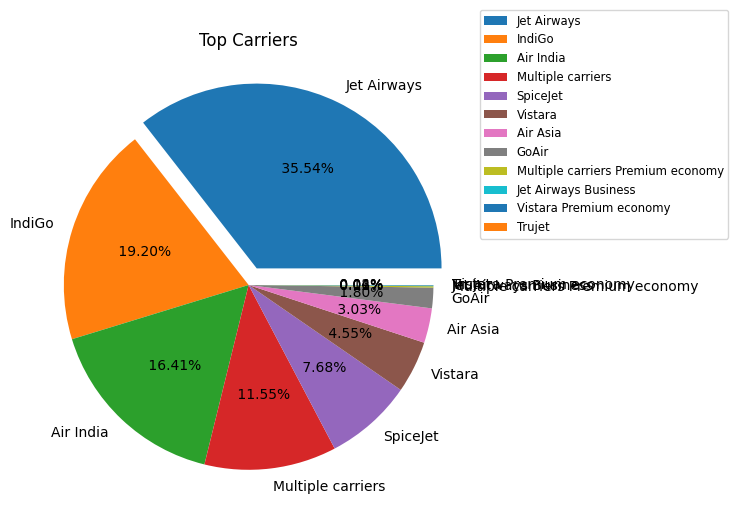

In [ ]:
# visualize top carriers
plt.figure(figsize=(8,6))
plt.pie(d_values, labels=d_keys,autopct= "% 2.2f%%",explode=[0.1,0,0,0,0,0,0,0,0,0,0,0])
plt.legend(labels=d_keys,loc=(1,0.6),fontsize='small')
plt.title('Top Carriers')
plt.show()


'Jet Airways' operates the most number of flights while Air India, IndiGo, and SpiceJet operate a significant portion of the flights

In [ ]:

busy_routes = df_copy['Route'].value_counts().reset_index()
busy_routes = busy_routes.head(8)
busy_routes

,index,Route
0,DEL → BOM → COK,3000
1,BLR → DEL,1941
2,CCU → BOM → BLR,1232
3,CCU → BLR,896
4,BOM → HYD,785
5,CCU → DEL → BLR,689
6,BLR → BOM → DEL,509
7,MAA → CCU,456


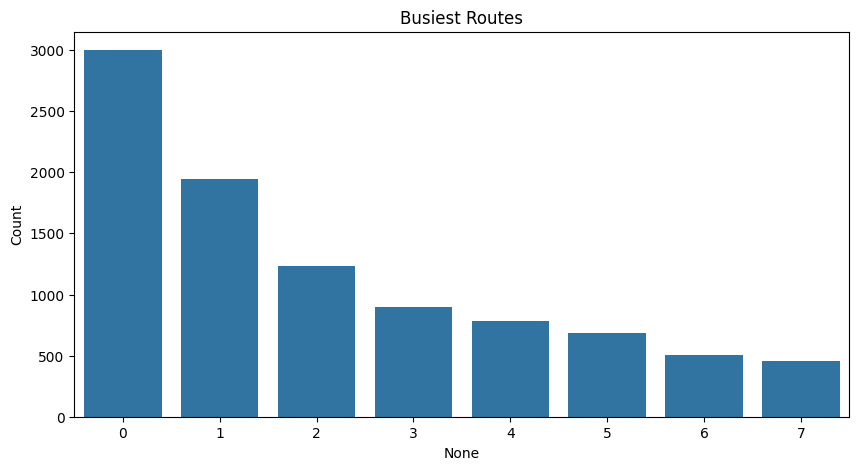

In [ ]:
#visualize route
plt.figure(figsize=(10,5))
sns.barplot(x=busy_routes.index, y=busy_routes.Route)
plt.title('Busiest Routes')
plt.ylabel('Count')
plt.show()

The busiest route with 3000 flights is from Delhi to Cochin via Mumbai.

<BarContainer object of 13354 artists>

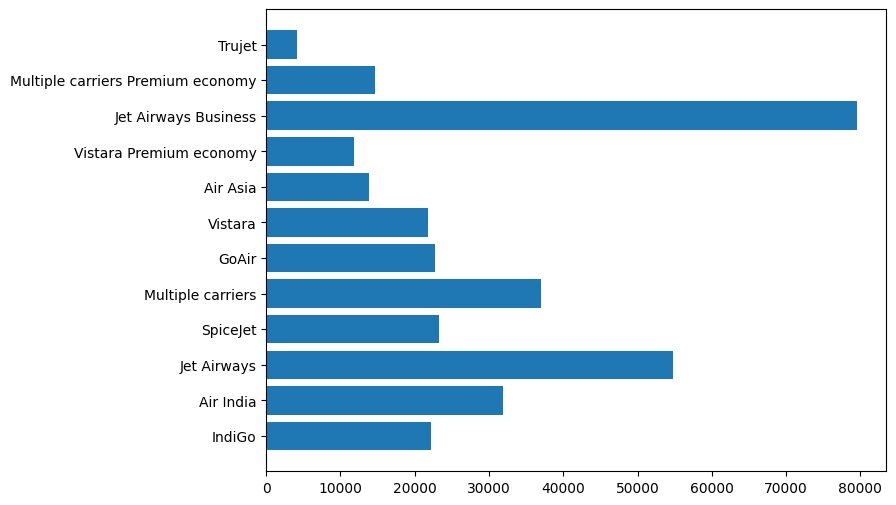

In [ ]:
# to see price of the airline
plt.figure(figsize=(8,6))

plt.barh(df_copy['Airline'],df_copy['Price'])

jet Airways price is soo peak

(1000.0, 30000.0)

<Figure size 1800x600 with 0 Axes>

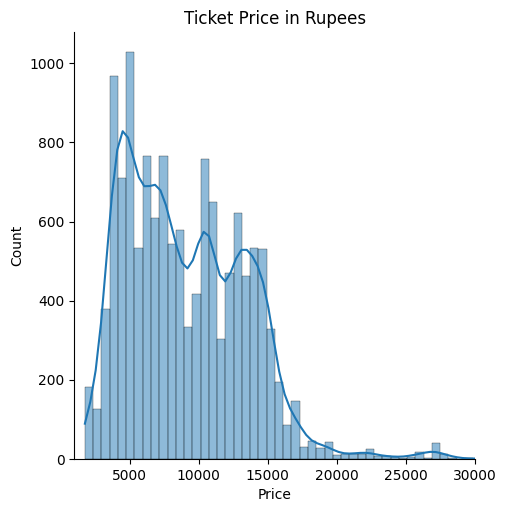

In [ ]:
# peak of the ticket price
plt.figure(figsize=(18,6))
sns.displot(x=df_copy['Price'], data=df_copy, kde=True)
plt.title('Ticket Price in Rupees')
plt.xlim([1000, 30000])

Most of the Tickets are priced between 4000-15000

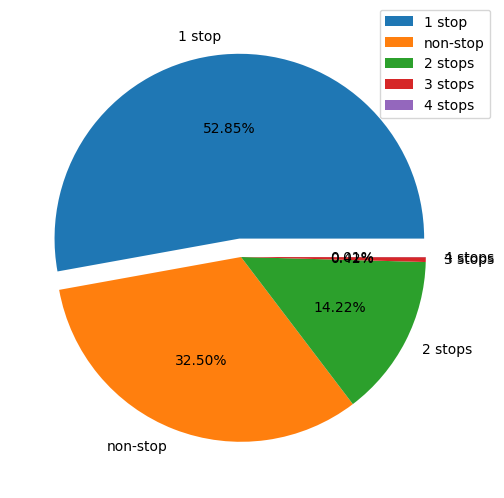

In [ ]:
# visualize flight stops
Total_Stops_Val = df.Total_Stops.value_counts().values
Total_Stops_In = df_copy5.Total_Stops.value_counts().index

plt.figure(figsize=(8,6))
plt.pie(x=Total_Stops_Val, labels= Total_Stops_In, autopct='%.2f%%',explode=[0.1,0,0,0,0])
plt.legend(labels=Total_Stops_In,loc=(0.8,0.8))

Most of the flights route have one stops

In [ ]:
# airpots with more no.of flights

df_copy['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

<Axes: xlabel='Source', ylabel='count'>

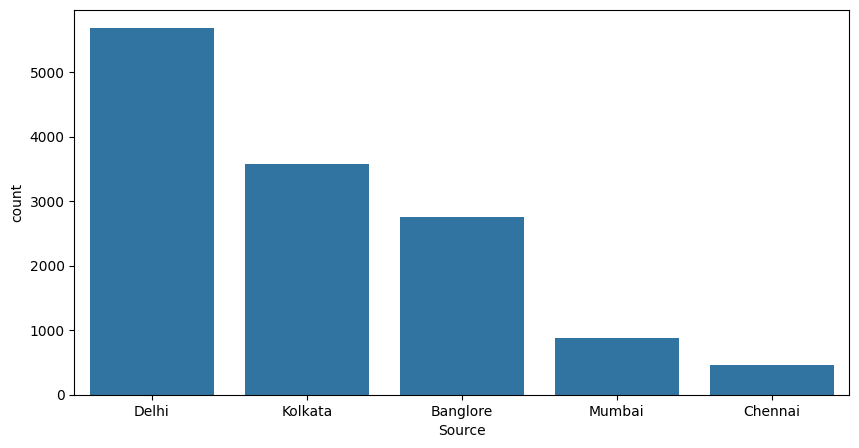

In [ ]:
plt.figure(figsize=(10,5))
y= df_copy['Source'].value_counts().index
sns.countplot(x=df_copy['Source'], order=y)

Delhi is the Busiest Airport with 5682 flights followed by Kolkata and Bangalore Airports.

# **Feature Encoding :**

In [ ]:
df_copy7 = df.copy()

In [ ]:
# for unique values
for i in df.columns:
  if df[i].dtype=='object':
    print(i," :",df[i].unique())


Airline  : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source  : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination  : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route1  : ['BLR' 'CCU' 'DEL' 'MAA' 'BOM' 'None']
Route2  : ['DEL' 'IXR' 'LKO' 'NAG' 'BLR' 'BOM' 'CCU' 'AMD' 'PNQ' 'COK' 'IDR' 'GAU'
 'MAA' 'HYD' 'BHO' 'JAI' 'ATQ' 'JDH' 'BBI' 'GOI' 'BDQ' 'TRV' 'IXU' 'IXB'
 'UDR' 'RPR' 'DED' 'VGA' 'VNS' 'IXC' 'PAT' 'JLR' 'KNU' 'GWL' 'VTZ' 'NDC'
 'IXZ' 'HBX' 'IXA' 'STV' 'None']
Route3  : ['None' 'BBI' 'BOM' 'BLR' 'DEL' 'COK' 'AMD' 'HYD' 'JDH' 'MAA' 'GOI' 'NAG'
 'GAU' 'BHO' 'IXR' 'IDR' 'ISK' 'VGA' 'PNQ' 'JAI' 'TRV' 'HBX' 'IMF' 'CCU'
 'UDR' 'VTZ' 'IXC' 'TIR']
Route4  : ['None' 'BLR' 'COK' 'DEL' 'BOM' 'HYD' 'GWL' 'TRV' 'BBI' 'BHO' 'AMD' 'NAG']
Route5  : ['None' 'COK' 'BLR' 'DEL' 'HYD' 'VGA']


In [ ]:
# encode features using get_dummies
df =pd.get_dummies(df,columns=['Airline','Source','Destination'])

In [ ]:
df.sample(4)

,Total_Stops,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1923,0,5644.0,15,6,2019,CCU,BLR,None,None,None,...,0,0,1,0,1,0,0,0,0,0
1440,2,12488.0,3,6,2019,DEL,LKO,BOM,COK,None,...,0,1,0,0,0,1,0,0,0,0
3710,0,4049.0,9,5,2019,BOM,HYD,None,None,None,...,0,0,0,1,0,0,0,1,0,0
6572,0,5747.0,12,3,2019,CCU,BLR,None,None,None,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                13354 non-null  int64  
 1   Price                                      10683 non-null  float64
 2   Date                                       13354 non-null  int64  
 3   Month                                      13354 non-null  int64  
 4   Year                                       13354 non-null  int64  
 5   Route1                                     13354 non-null  object 
 6   Route2                                     13354 non-null  object 
 7   Route3                                     13354 non-null  object 
 8   Route4                                     13354 non-null  object 
 9   Route5                                     13354 non-null  object 
 10  Dep_Hours              

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [ ]:
# label encoding
for i in df.columns:
  if df[i].dtype=='object':
    df[i] = l.fit_transform(df[i])

lebel encoding for selecting feature which have dtype =='object' type

In [ ]:
df.head()

,Total_Stops,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,2019,0,10,21,10,4,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,2019,2,20,1,3,4,...,0,0,1,0,1,0,0,0,0,0
2,2,13882.0,9,6,2019,3,27,4,5,4,...,0,1,0,0,0,1,0,0,0,0
3,1,6218.0,12,5,2019,2,29,3,10,4,...,0,0,1,0,1,0,0,0,0,0
4,1,13302.0,1,3,2019,0,29,7,10,4,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_copy8 = df.copy()

finally data ready to build a model

# ***splitting data train and test ;***

In [ ]:
df.iloc[10680:10687,:]

,Total_Stops,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10680,0,7229.0,27,4,2019,0,10,21,10,4,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648.0,1,3,2019,0,10,21,10,4,...,0,0,0,0,0,0,0,0,0,1
10682,2,11753.0,9,5,2019,3,12,4,5,4,...,0,1,0,0,0,1,0,0,0,0
0,1,NaN,6,6,2019,3,6,6,10,4,...,0,1,0,0,0,1,0,0,0,0
1,1,NaN,12,5,2019,2,28,3,10,4,...,0,0,1,0,1,0,0,0,0,0
2,1,NaN,21,5,2019,3,6,6,10,4,...,0,1,0,0,0,1,0,0,0,0
3,1,NaN,21,5,2019,3,6,6,10,4,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# splitting using iloc
df_train=df.iloc[:10683,:]
df_test = df.iloc[10683:,:]

# print shape of both data
print(df_train.shape)
print(df_test.shape)

(10683, 38)
(2671, 38)


splitting the data to train and test

# ***X,Y split ;***

In [ ]:
# x, y split for train data
x = df_train.drop('Price',axis=1)
y = df_train['Price']

# for new data
df_test.drop('Price',axis=1,inplace=True)

print("x ",x.shape)
print("y ",y.shape)

x  (10683, 37)
y  (10683,)


<ipython-input-607-f3f3340d4fe2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('Price',axis=1,inplace=True)


> splitting independent x and dependent variables y
and also for test data (new data)

In [ ]:
x.head(1)

,Total_Stops,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,0,10,21,10,4,22,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y.head(1)

0    3897.0
Name: Price, dtype: float64

# ***train_test_split ()***

In [ ]:
#spliting train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("x_train shape :",x_train.shape)
print("y_train shape :",y_train.shape)
print("x_test shape :",x_test.shape)
print("y_test shape :",y_test.shape)

x_train shape : (8546, 37)
y_train shape : (8546,)
x_test shape : (2137, 37)
y_test shape : (2137,)


In [ ]:
x_test.head(2)

,Total_Stops,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6076,1,18,5,2019,2,6,3,10,4,5,...,0,0,1,0,1,0,0,0,0,0
3544,1,3,6,2019,3,6,6,10,4,10,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
x_train.head(2)

,Total_Stops,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8990,2,12,3,2019,1,39,7,8,4,6,...,0,0,0,1,0,0,0,1,0,0
3684,1,9,5,2019,3,6,6,10,4,11,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)

x_train (8546, 37)
y_train (8546,)
x_test (2137, 37)



---



# ***Regularization :***

In [ ]:
# using lasso regularization for feature selection
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso(alpha=0.1)

In [ ]:
lasso.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.888e+10, tolerance: 1.819e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [ ]:
l=lasso.coef_
l

array([ 2.78921442e+03, -7.17263949e+01, -4.12447619e+02,  0.00000000e+00,
        1.93323084e+02, -5.90582116e+01, -5.93307091e+01,  1.60828602e+01,
        2.35333344e+02,  1.09341933e+01, -1.02980053e+00, -1.44664084e+01,
       -1.04173531e-14, -1.82898277e-01, -2.16147684e+03, -2.50514791e+02,
       -2.07736482e+03, -1.76530070e+03,  2.06628225e+03,  4.47798925e+04,
        1.20490528e+03,  1.43512796e+03, -2.06823158e+03, -3.40967752e+03,
        0.00000000e+00,  2.87541079e+02,  6.38158697e+02, -0.00000000e+00,
        6.14882693e+00, -0.00000000e+00, -5.76933105e+02, -0.00000000e+00,
        1.50914170e+01, -3.98213913e+02, -4.05951963e+01, -0.00000000e+00,
        1.62139158e+03])

In [ ]:
selected_features = x_train.columns[np.abs(l) > 0]

In [ ]:
selected_features

Index(['Total_Stops', 'Date', 'Month', 'Route1', 'Route2', 'Route3', 'Route4',
       'Route5', 'Dep_Hours', 'Dep_Minutes', 'Arrival_Hours',
       'Arrival_Minutes', 'Duration_in_min', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Delhi', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
x_train.describe()

,Total_Stops,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,8546.000000,8546.000000,8546.000000,8546.0,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,...,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.00000
mean,0.823075,13.586941,4.708636,2019.0,2.011818,9.720571,10.478938,9.232857,3.986894,12.490054,...,0.035806,0.420782,0.270536,0.064943,0.270536,0.420782,0.119003,0.064943,0.035806,0.08893
std,0.674755,8.477388,1.163141,0.0,1.208988,6.581360,7.682362,1.903605,0.204837,5.741757,...,0.185818,0.493713,0.444263,0.246439,0.444263,0.493713,0.323811,0.246439,0.185818,0.28466
min,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,6.000000,3.000000,2019.0,1.000000,6.000000,4.000000,10.000000,4.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,12.000000,5.000000,2019.0,2.000000,7.000000,6.000000,10.000000,4.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,21.000000,6.000000,2019.0,3.000000,10.000000,21.000000,10.000000,4.000000,18.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,4.000000,27.000000,6.000000,2019.0,5.000000,40.000000,27.000000,11.000000,5.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
x_train.corr()

,Total_Stops,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,-0.016440,0.055985,NaN,0.427051,0.170041,-0.782910,-0.720489,-0.205594,-0.062105,...,-0.235080,0.487670,0.036717,-0.259556,0.036717,0.487670,-0.448343,-0.259556,-0.235080,-0.014950
Date,-0.016440,1.000000,-0.040561,NaN,0.077630,-0.021566,0.027688,-0.007992,-0.001231,0.005715,...,0.011545,0.095776,-0.058356,-0.018360,-0.058356,0.095776,0.002306,-0.018360,0.011545,-0.069303
Month,0.055985,-0.040561,1.000000,NaN,0.236717,0.044215,-0.094655,-0.074904,0.000672,0.035821,...,0.007666,0.144842,0.085750,-0.041763,0.085750,0.144842,0.092381,-0.041763,0.007666,-0.458978
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route1,0.427051,0.077630,0.236717,NaN,1.000000,-0.047533,-0.459591,-0.192696,-0.017804,-0.038716,...,0.316925,0.697095,-0.005954,-0.220573,-0.005954,0.697095,-0.611624,-0.220573,0.316925,-0.519927
Route2,0.170041,-0.021566,0.044215,NaN,-0.047533,1.000000,-0.014578,-0.255944,-0.086053,-0.118843,...,-0.079665,0.047139,-0.131721,0.195617,-0.131721,0.047139,0.015605,0.195617,-0.079665,-0.011284
Route3,-0.782910,0.027688,-0.094655,NaN,-0.459591,-0.014578,1.000000,0.232403,-0.029105,0.005848,...,0.263929,-0.437679,-0.207150,0.325398,-0.207150,-0.437679,0.503364,0.325398,0.263929,0.055815
Route4,-0.720489,-0.007992,-0.074904,NaN,-0.192696,-0.255944,0.232403,1.000000,0.132980,0.049303,...,0.077664,-0.215089,0.006176,0.090495,0.006176,-0.215089,0.148121,0.090495,0.077664,0.065876
Route5,-0.205594,-0.001231,0.000672,NaN,-0.017804,-0.086053,-0.029105,0.132980,1.000000,0.044367,...,0.012330,-0.018367,-0.007330,0.012226,-0.007330,-0.018367,0.023516,0.012226,0.012330,-0.002087
Dep_Hours,-0.062105,0.005715,0.035821,NaN,-0.038716,-0.118843,0.005848,0.049303,0.044367,1.000000,...,-0.012609,-0.118574,0.158508,-0.010171,0.158508,-0.118574,0.003186,-0.010171,-0.012609,-0.028314


<Axes: >

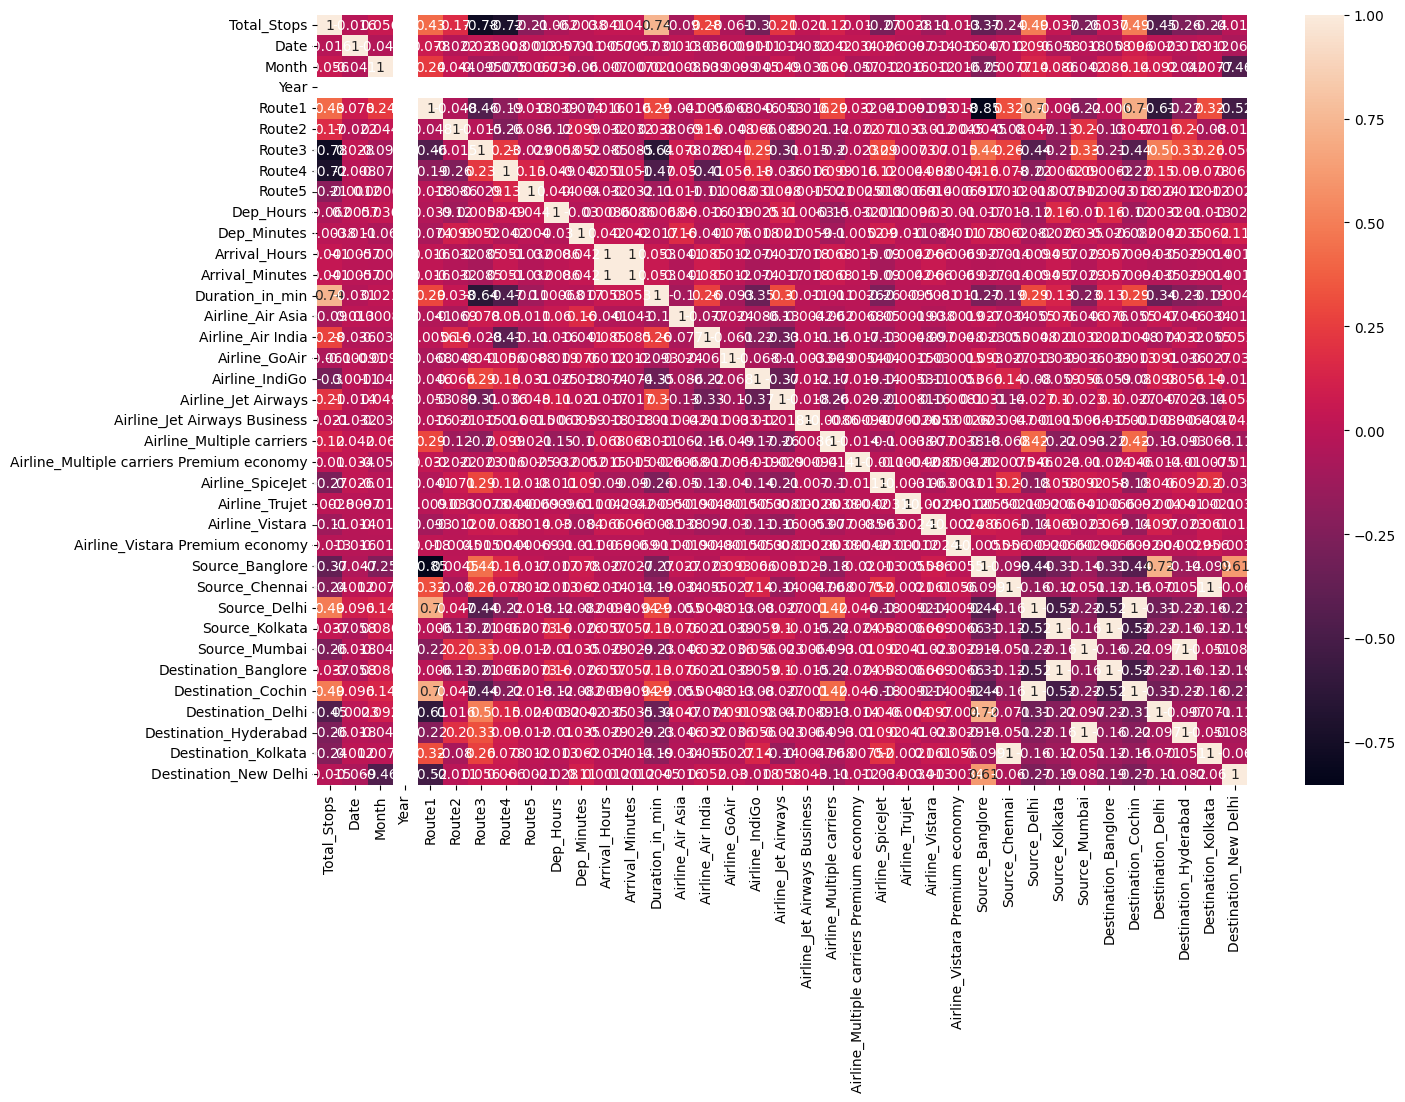

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

There is no correlation between the 'year' independent variable and the dependent variable 'price', and this feature does not affect the prediction. Lasso is used for feature selection.


In [ ]:
# for model data
x_train.drop('Year',axis=1,inplace=True)
x_test.drop('Year',axis=1,inplace=True)

# for new data
# df_test.drop('Year',axis=1,inplace=True)


In [ ]:
x_test.head(3)

,Total_Stops,Date,Month,Route1,Route2,Route3,Route4,Route5,Dep_Hours,Dep_Minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6076,1,18,5,2,6,3,10,4,5,45,...,0,0,1,0,1,0,0,0,0,0
3544,1,3,6,3,6,6,10,4,10,35,...,0,1,0,0,0,1,0,0,0,0
7313,1,1,5,2,6,3,10,4,14,5,...,0,0,1,0,1,0,0,0,0,0


# ***Model Building:***

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


# **1.Linear Regression;**

In [ ]:
l_r = LinearRegression()

# fitting model
l_r.fit(x_train,y_train)

# predict price
lr_train_pred = l_r.predict(x_train)  # train data
lr_test_pred = l_r.predict(x_test)     # test data

# evaluation

# for train data
print("Train data_________________________")
print("Train data  MAE:",mean_absolute_error(y_train,lr_train_pred))
print("Train data  MSE:",mean_squared_error(y_train,lr_train_pred))
print("Train data R2_score:",r2_score(y_train,lr_train_pred))

# for test data
print("Test data_________________________")
print("Test data  MAE:",mean_absolute_error(y_test,lr_test_pred))
print("Test data  MSE:",mean_squared_error(y_test,lr_test_pred))
print("Test data R2_score:",r2_score(y_test,lr_test_pred))

Train data_________________________
Train data  MAE: 1925.0694712305333
Train data  MSE: 7803792.473132759
Train data R2_score: 0.6333936037711827
Test data_________________________
Test data  MAE: 1966.6750032898835
Test data  MSE: 7930281.871225059
Test data R2_score: 0.6252932058971669


# **RandomForest Regresser ;**

In [ ]:
rfr = RandomForestRegressor()

# fitting model
rfr.fit(x_train,y_train)

# predict price
rfr_train_pred = rfr.predict(x_train)  # train data
rfr_test_pred = rfr.predict(x_test)     # test data

In [ ]:
# evaluation

# for train data
print("Train data_________________________")
print("Train data  MAE:",mean_absolute_error(y_train,rfr_train_pred))
print("Train data  MSE:",mean_squared_error(y_train,rfr_train_pred))
print("Train data R2_score:",r2_score(y_train,rfr_train_pred))

# for test data
print("Test data_________________________")
print("Test data  MAE:",mean_absolute_error(y_test,rfr_test_pred))
print("Test data  MSE:",mean_squared_error(y_test,rfr_test_pred))
print("Test data R2_score:",r2_score(y_test,rfr_test_pred))


Train data_________________________
Train data  MAE: 555.231939980041
Train data  MSE: 940065.5021139852
Train data R2_score: 0.9558376229076359
Test data_________________________
Test data  MAE: 1153.5913046937853
Test data  MSE: 4001360.3895560447
Test data R2_score: 0.8109352292935593


# **3.XGBoost Regreser;**





In [ ]:
xgb = XGBRegressor()

# fitting model
xgb.fit(x_train,y_train)

# predict price
xgb_train_pred = xgb.predict(x_train)  # train data
xgb_test_pred = xgb.predict(x_test)     # test data

# evaluation
# for train data
print("Train data_________________________")
print("Train data  MAE:",mean_absolute_error(y_train,xgb_train_pred))
print("Train data  MSE:",mean_squared_error(y_train,xgb_train_pred))
print("Train data R2_score:",r2_score(y_train,xgb_train_pred))

# for test data
print("Test data_________________________")
print("Test data  MAE:",mean_absolute_error(y_test,xgb_test_pred))
print("Test data  MSE:",mean_squared_error(y_test,xgb_test_pred))
print("Test data R2_score:",r2_score(y_test,xgb_test_pred))

Train data_________________________
Train data  MAE: 805.8918447746707
Train data  MSE: 1378855.058375532
Train data R2_score: 0.93522417649966
Test data_________________________
Test data  MAE: 1110.214668784456
Test data  MSE: 3123619.0154126994
Test data R2_score: 0.8524086172131065


# **4.GradientBoostingRegressor ;**

In [ ]:
gb =GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)

# fitting model
gb.fit(x_train,y_train)

# predict price
gb_train_pred = gb.predict(x_train)  # train data
gb_test_pred = gb.predict(x_test)     # test data

# evaluation
# for train data
print("Train data_________________________")
print("Train data  MAE:",mean_absolute_error(y_train,gb_train_pred))
print("Train data  MSE:",mean_squared_error(y_train,gb_train_pred))
print("Train data R2_score:",r2_score(y_train,gb_train_pred))

# for test data
print("Test data_________________________")
print("Test data  MAE:",mean_absolute_error(y_test,gb_test_pred))
print("Test data  MSE:",mean_squared_error(y_test,gb_test_pred))
print("Test data R2_score:",r2_score(y_test,gb_test_pred))

Train data_________________________
Train data  MAE: 1435.4159233078335
Train data  MSE: 4233823.534246894
Train data R2_score: 0.8011035283802321
Test data_________________________
Test data  MAE: 1511.856915166874
Test data  MSE: 4499038.389588131
Test data R2_score: 0.7874198825611581


# **Hyper Parameter Tuning :**

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV


In [ ]:
n_estimators = [int(x) for x in np.linspace(start=900,stop=1400,num=6)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(30, 70, num = 6)] # Max number of levels in tree
min_samples_split = [3,5,10,12,15,17,20] # Min number of samples required to split a node
min_samples_leaf = [1, 2, 5, 10] # Min number of samples requred at each leaft node

rf_param_grid = {

    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

print(rf_param_grid)

{'n_estimators': [900, 1000, 1100, 1200, 1300, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [30, 38, 46, 54, 62, 70], 'min_samples_split': [3, 5, 10, 12, 15, 17, 20], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rfr=RandomForestRegressor()
#rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv=3,verbose=2,n_jobs=1)
#rf_grid.fit(X_train,y_train)
rf_tunned = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator = rfr, param_distributions = rf_param_grid, n_iter=30, cv=5, verbose=2, n_jobs=1)
rf_tunned.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=1400; total time=  31.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=1400; total time=  30.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=1400; total time=  29.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=1400; total time=  30.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=1400; total time=  30.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1100; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1100; total time=  22.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1100; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1100; total time=  22.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1100; total time=  22.2s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=12, n_estimators=1400; total time=   8.1s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=12, n_estimators=1400; total time=   8.1s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=12, n_estimators=1400; total time=   7.2s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=12, n_estimators=1400; total time=   8.1s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=12, n_estimators=1400; total time=   8.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=1400; total time=   7.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=1400; total time=   8.0s
[CV] END max_dept

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1300; total time=  29.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1300; total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1300; total time=  29.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1300; total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1300; total time=  30.1s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1200; total time=   7.1s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1200; total time=   7.9s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1200; total time=   7.7s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1200; total time=   7.4s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1200; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=  17.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=  18.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=  17.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=  18.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1000; total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=  16.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=  16.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=  16.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=  16.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=  16.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  20.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  21.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=54, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  20.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=  21.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=  21.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=  21.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=  21.7s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=1400; total time=   8.3s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=1400; total time=   7.6s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=1400; total time=   8.5s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=1400; total time=   8.5s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=1400; total time=   7.7s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1300; total time=  10.9s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1300; total time=  10.8s
[CV] END max_depth=70, max

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  21.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  21.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  21.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  22.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  22.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=  21.5s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=1200; total time=   8.2s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=1200; total time=   8.2s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=1200; total time=   7.5s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=1200; total time=   8.3s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=1200; total time=   8.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=1400; total time=   8.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=1400; total time=   9.6s
[CV] END max_depth=30, m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1300; total time=  36.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1300; total time=  36.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1300; total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1300; total time=  36.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=62, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1300; total time=  36.7s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1400; total time=   9.4s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1400; total time=   9.4s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1400; total time=   9.1s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1400; total time=   8.8s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1400; total time=   9.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1300; total time=   7.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1300; total time=   6.6s
[CV] END max_depth=30, 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=1100; total time=  23.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=1100; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=1100; total time=  23.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=1100; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=1100; total time=  23.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   8.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   8.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   7.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   8.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  20.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  21.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  21.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1300; total time=  26.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1300; total time=  26.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1300; total time=  27.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1300; total time=  26.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=1300; total time=  26.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  31.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  31.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  30.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  31.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  31.5s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1300; total time=   6.8s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1300; total time=   7.5s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1300; total time=   6.8s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1300; total time=   7.5s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1300; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=  25.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=  25.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=  25.5s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1400; total time=  11.6s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1400; total time=  11.5s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1400; total time=  11.6s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1400; total time=  11.4s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1400; total time=  11.1s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   6.4s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   6.9s
[CV] END max_depth=62, max_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30, n_jobs=1,
                   param_distributions={'max_depth': [30, 38, 46, 54, 62, 70],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [3, 5, 10, 12, 15,
                                                              17, 20],
                                        'n_estimators': [900, 1000, 1100, 1200,
                                                         1300, 1400]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:

# predict price
rfr_t_train_pred = rf_tunned.predict(x_train)  # train data
rfr_t_test_pred = rf_tunned.predict(x_test)     # test data

# evaluation
# for train data
print("Train data_________________________")
print("Train data  MAE:",mean_absolute_error(y_train,rfr_t_train_pred))
print("Train data  MSE:",mean_squared_error(y_train,rfr_t_train_pred))
print("Train data R2_score:",r2_score(y_train,rfr_t_train_pred))

# for test data
print("Test data_________________________")
print("Test data  MAE:",mean_absolute_error(y_test,rfr_t_test_pred))
print("Test data  MSE:",mean_squared_error(y_test,rfr_t_test_pred))
print("Test data R2_score:",r2_score(y_test,rfr_t_test_pred))

Train data_________________________
Train data  MAE: 876.2539479847418
Train data  MSE: 2121714.1879939977
Train data R2_score: 0.9003261561649682
Test data_________________________
Test data  MAE: 1137.2630399482339
Test data  MSE: 3630162.0979957525
Test data R2_score: 0.8284743942394731



# **1.XGBoost Regreser;**




In [ ]:
params = {
 "n_estimators": [int(x) for x in np.linspace(start=400,stop=700,num=7)], # Number of trees in random forest
 "learning_rate" : [0.01,0.02,0.04, 0.05,0.06,0.07],
 "max_depth" : [ 3, 4, 5, 6, 8, 10],
 "min_child_weight" : [2, 3, 4, 5],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 ,0.6, 0.7 ]
}

In [ ]:
xgb_model_tuned = RandomizedSearchCV(estimator = xgb, param_distributions = params, scoring='neg_mean_squared_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb_model_tuned.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.04, max_depth=8, min_child_weight=5, n_estimators=450; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.04, max_depth=8, min_child_weight=5, n_estimators=450; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.04, max_depth=8, min_child_weight=5, n_estimators=450; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.04, max_depth=8, min_child_weight=5, n_estimators=450; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.04, max_depth=8, min_child_weight=5, n_estimators=450; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.06, max_depth=3, min_child_weight=2, n_estimators=550; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0.0, learning_rate=0.06, max_depth=3, min_child_weight=2, n_estimators=550; total time=   0.5s
[CV] END colsa

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=30, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.05, 0.06, 0.07],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'min_child_weight': [2, 3, 4, 5],
                                        'n_estimators': [400, 450, 500, 550,
                                                         600, 650, 700]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
xgb_model_tuned.best_params_

{'n_estimators': 650,
 'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.04,
 'gamma': 0.2,
 'colsample_bytree': 0.6}

In [ ]:
xgb_t_pred =xgb_model_tuned.predict(x_test)
print("Test data r2_score:",r2_score(y_test,xgb_t_pred))
# predict price
xgb_t_train_pred = xgb_model_tuned.predict(x_train)  # train data
xgb_t_test_pred = xgb_model_tuned.predict(x_test)     # test data

# evaluation
# for train data
print("Train data_________________________")
print("Train data  MAE:",mean_absolute_error(y_train,xgb_t_train_pred))
print("Train data  MSE:",mean_squared_error(y_train,xgb_t_train_pred))
print("Train data R2_score:",r2_score(y_train,xgb_t_train_pred))

# for test data
print("Test data_________________________")
print("Test data  MAE:",mean_absolute_error(y_test,xgb_t_test_pred))
print("Test data  MSE:",mean_squared_error(y_test,xgb_t_test_pred))
print("Test data R2_score:",r2_score(y_test,xgb_t_test_pred))

Test data r2_score: 0.8631811939721249
Train data_________________________
Train data  MAE: 893.8191798000572
Train data  MSE: 1712689.847687169
Train data R2_score: 0.9195412928931698
Test data_________________________
Test data  MAE: 1110.1624168071114
Test data  MSE: 2895628.566552624
Test data R2_score: 0.8631811939721249


# **conclusion :**
1. performed linear regression, Randomforest Regressor, XGBoost Regressor, and Gradient Boost regressor Algorithms.
2. Randomforest Regressor and XGBoost Regressor algorithms are performed very well .finaly tuning these two algorithms XGBoost Regressor gives a good performance.

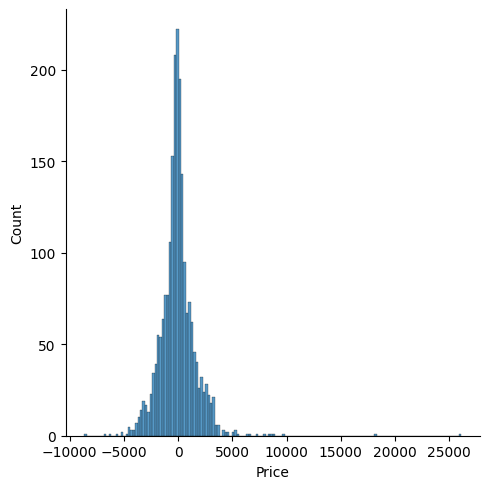

In [ ]:
sns.displot(y_test-xgb_t_pred)

Text(0.5, 1.0, ' Test Data')

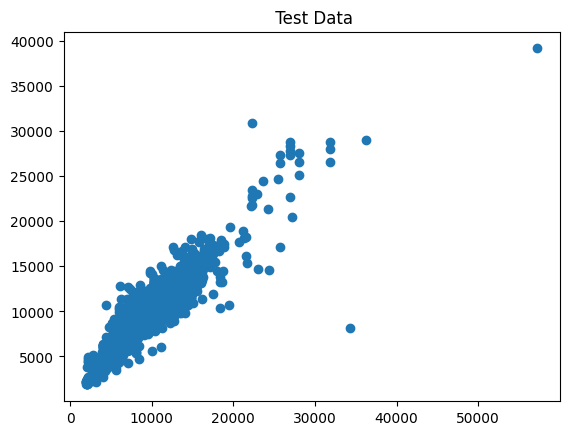

In [ ]:

plt.scatter(y_test,xgb_t_pred)
plt.title(" Test Data")

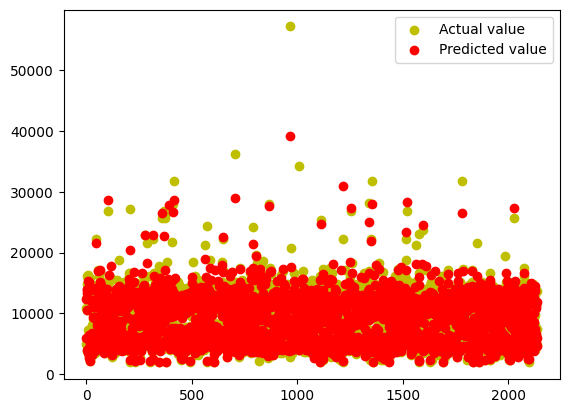

In [ ]:
# compare actual value and predicted value
plt.scatter(np.arange(len(x_test)),y_test,color='y',label="Actual value")
plt.scatter(np.arange(len(x_test)),xgb_t_pred,color='r',label='Predicted value')
plt.legend()

# **New Data Prediction:**

In [ ]:
df_test.drop('Year',axis=1,inplace=True)

<ipython-input-653-a5c2bb8c1a0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('Year',axis=1,inplace=True)


In [ ]:
# predict new data
price =xgb_model_tuned.predict(df_test)

# add predicted price
test_data['Price']= price.astype(int)
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,11444
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4483
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13768
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,11021
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4005
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,9948
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,4768
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,16056
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,13838
